In [1]:
#!python -m spacy download el_core_news_sm

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
from PIL import Image

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
Putin_full_tweets_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Final_Tweets_about_Putin.tsv", sep='\t') 

In [6]:
print(Putin_full_tweets_df.shape)
print(f"dtype of 'created_at' is: {Putin_full_tweets_df.created_at.dtypes}") 
Putin_full_tweets_df.head(1)

(4000, 31)
dtype of 'created_at' is: object


Unnamed: 0                      created_at                   id  \
0           0  Mon Jun 20 15:10:12 +0000 2022  1538902041753489409   

                id_str  \
0  1538902041753489409   

                                                                                                                                           text  \
0  RT @KYTKYTKYTKYTKYT: ΑΠΙΣΤΕΥΤΟ βίντεο, η...κ. Πελόζι ξέχασε ήδη τον Γκουαιδό στη Βενεζουέλα!!! Κάνει ότι δεν θυμάται ούτε το όνομά του! Δεί…   

   truncated  \
0      False   

                                                                                                                                                                                               entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KYTKYTKYTKYTKYT', 'name': 'Καθίκι', 'id': 1052877677605134336, 'id_str': '1052877677605134336', 'indices': [3, 19]}], 'urls': []}   

                                               metadata  \
0  {'iso_language_code': 'el', 'result_type': 'recent'}   

                                                                                 source  \
0  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   

   in_reply_to_status_id  ...  retweet_count  favorite_count  favorited  \
0                    NaN  ...             16               0      False   

  retweeted lang  possibly_sensitive  extended_entities quoted_status_id  \
0     False   el                 NaN                NaN              NaN   

   quoted_status_id_str quoted_status  
0                   NaN           NaN  

[1 rows x 31 columns]

In [7]:
Putin_full_tweets_df['datetime'] = pd.to_datetime(Putin_full_tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [8]:
Putin_full_tweets_df['name']= 'Πούτιν'

In [9]:
Putin_full_tweets_df

Unnamed: 0                      created_at                   id  \
0              0  Mon Jun 20 15:10:12 +0000 2022  1538902041753489409   
1              1  Mon Jun 20 15:09:49 +0000 2022  1538901941891305472   
2              2  Mon Jun 20 15:09:23 +0000 2022  1538901835817394177   
3              3  Mon Jun 20 15:08:19 +0000 2022  1538901564923990023   
4              4  Mon Jun 20 15:07:49 +0000 2022  1538901441259126785   
...          ...                             ...                  ...   
3995        3995  Fri Jun 17 14:37:10 +0000 2022  1537806561745285132   
3996        3996  Fri Jun 17 14:36:43 +0000 2022  1537806449501425665   
3997        3997  Fri Jun 17 14:36:03 +0000 2022  1537806284145274881   
3998        3998  Fri Jun 17 14:35:56 +0000 2022  1537806252742520834   
3999        3999  Fri Jun 17 14:35:49 +0000 2022  1537806223625670657   

                   id_str  \
0     1538902041753489409   
1     1538901941891305472   
2     1538901835817394177   
3     1538901564923990023   
4     1538901441259126785   
...                   ...   
3995  1537806561745285132   
3996  1537806449501425665   
3997  1537806284145274881   
3998  1537806252742520834   
3999  1537806223625670657   

                                                                                                                                                text  \
0       RT @KYTKYTKYTKYTKYT: ΑΠΙΣΤΕΥΤΟ βίντεο, η...κ. Πελόζι ξέχασε ήδη τον Γκουαιδό στη Βενεζουέλα!!! Κάνει ότι δεν θυμάται ούτε το όνομά του! Δεί…   
1      RT @GiannesT1: #Ρωσια #ΚΚΡΟ \nΑκύρωση περιφερειακών εκλογών στην Ρωσική Άπω Ανατολή λόγω νοθείας (που έγινε απο τον #Πουτιν εις βάρος των Κο…   
2      #Ρωσια #ΚΚΡΟ \nΑκύρωση περιφερειακών εκλογών στην Ρωσική Άπω Ανατολή λόγω νοθείας (που έγινε απο τον #Πουτιν εις βάρ… https://t.co/VObf5kxfYZ   
3     RT @GiannesT1: #Ρωσια\nΚάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές.\nΤο καπιταλιστικό κα…   
4     #Ρωσια\nΚάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές.\nΤο καπιταλ… https://t.co/ppH3fKO6ZX   
...                                                                                                                                              ...   
3995                               Πούτιν: «Ανόητες» οι κυρώσεις, γίνονται μπούμερανγκ για τη Δύση - https://t.co/2KvIE1yxEx https://t.co/BbApsGyS1k   
3996   RT @KYTKYTKYTKYTKYT: #Μαριούπολη: Ξεκίνησε η κατασκευή κτιρίων διαμερισμάτων, σούπερ μάρκετ και νοσοκομείων!\nΣτόχος της περάτωσης πολλών έρ…   
3997                                                                                    @LiberalGr Προχώρα Πούτιν.... με τούς ΠΟΥΣΤΗΔΕΣ που μπλέξαμε   
3998                                    Επίθεση Πούτιν κατά Δύσης: «Τίποτε δεν θα είναι όπως παλιά στην παγκόσμια πολιτική»\nhttps://t.co/DFyJ9OiDbk   
3999                   Τορίνο: «Κάντε Έρωτα και όχι Πόλεμο» - Το... καυτό φιλί Πούτιν και Ζελένσκι, σήμα-κατατεθέν του Pride https://t.co/paLPNfMcUw   

      truncated  \
0         False   
1         False   
2          True   
3         False   
4          True   
...         ...   
3995      False   
3996      False   
3997      False   
3998      False   
3999      False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [10]:
Putin_tweets_df = Putin_full_tweets_df[['datetime', "text", 'name']]

In [11]:
Putin_tweets_df

datetime  \
0    2022-06-20 15:10:12   
1    2022-06-20 15:09:49   
2    2022-06-20 15:09:23   
3    2022-06-20 15:08:19   
4    2022-06-20 15:07:49   
...                  ...   
3995 2022-06-17 14:37:10   
3996 2022-06-17 14:36:43   
3997 2022-06-17 14:36:03   
3998 2022-06-17 14:35:56   
3999 2022-06-17 14:35:49   

                                                                                                                                                text  \
0       RT @KYTKYTKYTKYTKYT: ΑΠΙΣΤΕΥΤΟ βίντεο, η...κ. Πελόζι ξέχασε ήδη τον Γκουαιδό στη Βενεζουέλα!!! Κάνει ότι δεν θυμάται ούτε το όνομά του! Δεί…   
1      RT @GiannesT1: #Ρωσια #ΚΚΡΟ \nΑκύρωση περιφερειακών εκλογών στην Ρωσική Άπω Ανατολή λόγω νοθείας (που έγινε απο τον #Πουτιν εις βάρος των Κο…   
2      #Ρωσια #ΚΚΡΟ \nΑκύρωση περιφερειακών εκλογών στην Ρωσική Άπω Ανατολή λόγω νοθείας (που έγινε απο τον #Πουτιν εις βάρ… https://t.co/VObf5kxfYZ   
3     RT @GiannesT1: #Ρωσια\nΚάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές.\nΤο καπιταλιστικό κα…   
4     #Ρωσια\nΚάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές.\nΤο καπιταλ… https://t.co/ppH3fKO6ZX   
...                                                                                                                                              ...   
3995                               Πούτιν: «Ανόητες» οι κυρώσεις, γίνονται μπούμερανγκ για τη Δύση - https://t.co/2KvIE1yxEx https://t.co/BbApsGyS1k   
3996   RT @KYTKYTKYTKYTKYT: #Μαριούπολη: Ξεκίνησε η κατασκευή κτιρίων διαμερισμάτων, σούπερ μάρκετ και νοσοκομείων!\nΣτόχος της περάτωσης πολλών έρ…   
3997                                                                                    @LiberalGr Προχώρα Πούτιν.... με τούς ΠΟΥΣΤΗΔΕΣ που μπλέξαμε   
3998                                    Επίθεση Πούτιν κατά Δύσης: «Τίποτε δεν θα είναι όπως παλιά στην παγκόσμια πολιτική»\nhttps://t.co/DFyJ9OiDbk   
3999                   Τορίνο: «Κάντε Έρωτα και όχι Πόλεμο» - Το... καυτό φιλί Πούτιν και Ζελένσκι, σήμα-κατατεθέν του Pride https://t.co/paLPNfMcUw   

        name  
0     Πούτιν  
1     Πούτιν  
2     Πούτιν  
3     Πούτιν  
4     Πούτιν  
...      ...  
3995  Πούτιν  
3996  Πούτιν  
3997  Πούτιν  
3998  Πούτιν  
3999  Πούτιν  

[4000 rows x 3 columns]

In [12]:
Zelensky_full_tweets_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Final_Tweets_about_Zelensky.tsv", sep='\t') 

In [13]:
print(Zelensky_full_tweets_df.shape)
print(f"dtype of 'created_at' is: {Zelensky_full_tweets_df.created_at.dtypes}") 
Zelensky_full_tweets_df.head(1)

(4000, 31)
dtype of 'created_at' is: object


Unnamed: 0                      created_at                   id  \
0           0  Mon Jun 20 15:21:34 +0000 2022  1538904899102064640   

                id_str  \
0  1538904899102064640   

                                                                                                                                           text  \
0  RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   

   truncated  \
0      False   

                                                                                                                                                                                               entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KYTKYTKYTKYTKYT', 'name': 'Καθίκι', 'id': 1052877677605134336, 'id_str': '1052877677605134336', 'indices': [3, 19]}], 'urls': []}   

                                               metadata  \
0  {'iso_language_code': 'el', 'result_type': 'recent'}   

                                                                                 source  \
0  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   

   in_reply_to_status_id  ...  retweet_count  favorite_count  favorited  \
0                    NaN  ...             24               0      False   

  retweeted lang  extended_entities  possibly_sensitive quoted_status_id  \
0     False   el                NaN                 NaN              NaN   

   quoted_status_id_str quoted_status  
0                   NaN           NaN  

[1 rows x 31 columns]

In [14]:
Zelensky_full_tweets_df['datetime'] = pd.to_datetime(Zelensky_full_tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [15]:
Zelensky_full_tweets_df['name']= 'Ζελένσκι' 

In [16]:
Zelensky_full_tweets_df

Unnamed: 0                      created_at                   id  \
0              0  Mon Jun 20 15:21:34 +0000 2022  1538904899102064640   
1              1  Mon Jun 20 15:12:38 +0000 2022  1538902654575063040   
2              2  Mon Jun 20 15:11:05 +0000 2022  1538902262537506822   
3              3  Mon Jun 20 15:06:36 +0000 2022  1538901135871860737   
4              4  Mon Jun 20 15:06:13 +0000 2022  1538901038329102336   
...          ...                             ...                  ...   
3995        3995  Sat Jun 11 14:21:17 +0000 2022  1535628241393881093   
3996        3996  Sat Jun 11 14:06:53 +0000 2022  1535624615472635905   
3997        3997  Sat Jun 11 14:01:28 +0000 2022  1535623251686195202   
3998        3998  Sat Jun 11 13:58:11 +0000 2022  1535622426775605249   
3999        3999  Sat Jun 11 13:48:44 +0000 2022  1535620046172655616   

                   id_str  \
0     1538904899102064640   
1     1538902654575063040   
2     1538902262537506822   
3     1538901135871860737   
4     1538901038329102336   
...                   ...   
3995  1535628241393881093   
3996  1535624615472635905   
3997  1535623251686195202   
3998  1535622426775605249   
3999  1535620046172655616   

                                                                                                                                                    text  \
0           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
1           Ιταλία: Ο Ουκρανός Πρόεδρος Ζελένσκι ζητά την υποστήριξη στην αυριανή ψηφοφορία στη Γερουσία https://t.co/F1bpkBulPK https://t.co/8xmUlMPttU   
2           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
3           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
4                                          RT @sar_iannis: Το ινδαλμα του Δυτικου Κοσμου ο "δημοκρατης" #Ζελενσκι απαγορευει ρωσικα βιβλια και μουσικη !   
...                                                                                                                                                  ...   
3995                                      @NikosRHuda Οι Ουκρανοί εξέλεξαν τον Ζελένσκι με προεκλογική δέσμευση ότι θα επιδιώξει ειρήνη στα ανατολικά...   
3996                                                                                   RT @GiannesT1: Ή #Ουκρανια του #Ζελενσκι. https://t.co/lKQLuFAfA2   
3997        RT @KYTKYTKYTKYTKYT: Στο Ντνεπροπετρόβσκ εστάλει χαρτί κατάταξης σε... ουκρανό λίγο μετα την κηδεία του... Αγανακτισμένοι συγγενείς βρίζουν…   
3998        RT @Sidiropoulos_gr: Φεβρουάριος 2022. Οι αμερικανικές προειδοποιήσεις ότι οι Ρώσοι ετοιμάζουν εισβολή αγνοήθηκαν από πολλούς μεταξύ των οπ…   
3999  Ανατροπη\nΤων φαυλων\nΤων ψυχασθενων\nΠου θέλουν ΑΙΜΑ\nΟχι το δικό τους\nΑλλά το δικό μας ΑΙΜΑ\nΤΩΝ ΠΑΙΔΙΏΝ ΜΑΣ\nΜΗΝ ΤΟΥΣ… https://t.co/SvBAG5BWMs   

      truncated  \
0         False   
1         False   
2         False   
3         False   
4         False   
...         ...   
3995      False   
3996      False   
3997      False   
3998      False   
3999       True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [17]:
Zelensky_tweets_df = Zelensky_full_tweets_df[['datetime', "text", 'name']]

In [18]:
Zelensky_tweets_df

datetime  \
0    2022-06-20 15:21:34   
1    2022-06-20 15:12:38   
2    2022-06-20 15:11:05   
3    2022-06-20 15:06:36   
4    2022-06-20 15:06:13   
...                  ...   
3995 2022-06-11 14:21:17   
3996 2022-06-11 14:06:53   
3997 2022-06-11 14:01:28   
3998 2022-06-11 13:58:11   
3999 2022-06-11 13:48:44   

                                                                                                                                                    text  \
0           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
1           Ιταλία: Ο Ουκρανός Πρόεδρος Ζελένσκι ζητά την υποστήριξη στην αυριανή ψηφοφορία στη Γερουσία https://t.co/F1bpkBulPK https://t.co/8xmUlMPttU   
2           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
3           RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
4                                          RT @sar_iannis: Το ινδαλμα του Δυτικου Κοσμου ο "δημοκρατης" #Ζελενσκι απαγορευει ρωσικα βιβλια και μουσικη !   
...                                                                                                                                                  ...   
3995                                      @NikosRHuda Οι Ουκρανοί εξέλεξαν τον Ζελένσκι με προεκλογική δέσμευση ότι θα επιδιώξει ειρήνη στα ανατολικά...   
3996                                                                                   RT @GiannesT1: Ή #Ουκρανια του #Ζελενσκι. https://t.co/lKQLuFAfA2   
3997        RT @KYTKYTKYTKYTKYT: Στο Ντνεπροπετρόβσκ εστάλει χαρτί κατάταξης σε... ουκρανό λίγο μετα την κηδεία του... Αγανακτισμένοι συγγενείς βρίζουν…   
3998        RT @Sidiropoulos_gr: Φεβρουάριος 2022. Οι αμερικανικές προειδοποιήσεις ότι οι Ρώσοι ετοιμάζουν εισβολή αγνοήθηκαν από πολλούς μεταξύ των οπ…   
3999  Ανατροπη\nΤων φαυλων\nΤων ψυχασθενων\nΠου θέλουν ΑΙΜΑ\nΟχι το δικό τους\nΑλλά το δικό μας ΑΙΜΑ\nΤΩΝ ΠΑΙΔΙΏΝ ΜΑΣ\nΜΗΝ ΤΟΥΣ… https://t.co/SvBAG5BWMs   

          name  
0     Ζελένσκι  
1     Ζελένσκι  
2     Ζελένσκι  
3     Ζελένσκι  
4     Ζελένσκι  
...        ...  
3995  Ζελένσκι  
3996  Ζελένσκι  
3997  Ζελένσκι  
3998  Ζελένσκι  
3999  Ζελένσκι  

[4000 rows x 3 columns]

In [19]:
merged_tweets= Zelensky_tweets_df.merge(Putin_tweets_df, how='outer', on=['datetime', 'text', 'name'])

In [20]:
merged_tweets

datetime  \
0    2022-06-20 15:21:34   
1    2022-06-20 15:12:38   
2    2022-06-20 15:11:05   
3    2022-06-20 15:06:36   
4    2022-06-20 15:06:13   
...                  ...   
7995 2022-06-17 14:37:10   
7996 2022-06-17 14:36:43   
7997 2022-06-17 14:36:03   
7998 2022-06-17 14:35:56   
7999 2022-06-17 14:35:49   

                                                                                                                                               text  \
0      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
1      Ιταλία: Ο Ουκρανός Πρόεδρος Ζελένσκι ζητά την υποστήριξη στην αυριανή ψηφοφορία στη Γερουσία https://t.co/F1bpkBulPK https://t.co/8xmUlMPttU   
2      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
3      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
4                                     RT @sar_iannis: Το ινδαλμα του Δυτικου Κοσμου ο "δημοκρατης" #Ζελενσκι απαγορευει ρωσικα βιβλια και μουσικη !   
...                                                                                                                                             ...   
7995                              Πούτιν: «Ανόητες» οι κυρώσεις, γίνονται μπούμερανγκ για τη Δύση - https://t.co/2KvIE1yxEx https://t.co/BbApsGyS1k   
7996  RT @KYTKYTKYTKYTKYT: #Μαριούπολη: Ξεκίνησε η κατασκευή κτιρίων διαμερισμάτων, σούπερ μάρκετ και νοσοκομείων!\nΣτόχος της περάτωσης πολλών έρ…   
7997                                                                                   @LiberalGr Προχώρα Πούτιν.... με τούς ΠΟΥΣΤΗΔΕΣ που μπλέξαμε   
7998                                   Επίθεση Πούτιν κατά Δύσης: «Τίποτε δεν θα είναι όπως παλιά στην παγκόσμια πολιτική»\nhttps://t.co/DFyJ9OiDbk   
7999                  Τορίνο: «Κάντε Έρωτα και όχι Πόλεμο» - Το... καυτό φιλί Πούτιν και Ζελένσκι, σήμα-κατατεθέν του Pride https://t.co/paLPNfMcUw   

          name  
0     Ζελένσκι  
1     Ζελένσκι  
2     Ζελένσκι  
3     Ζελένσκι  
4     Ζελένσκι  
...        ...  
7995    Πούτιν  
7996    Πούτιν  
7997    Πούτιν  
7998    Πούτιν  
7999    Πούτιν  

[8000 rows x 3 columns]

In [21]:
merged_tweets['clean_text'] = merged_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.replace(r'[\n]*\s*https?:\/\/.*[\r\n]*'," ").str.replace(r'\n*',"").str.replace(r"\w\/\w", "").str.replace(r'[▪️✅🔽🤦😄😉😁🎶🎵🟥🆘✔🚨😳🍺▶🙌🏻☕🤔😆😅👍🤬😡🧐👁🤮🤓😉🅾😁🤨🙄💙🔴😅🔸💥👇🐑🧵😹🤷‍♂🎺🥁🦎😔😎😏🤷🏻😍🚴‍♀◄🍭🎖🤔⚡🖐😡📍🤣🤡🤮😂💩🔞🟢⚪👉]*',"")
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.replace('amp;', '').str.replace(r'[\!\?\*\=\-\:\,\.«»\"“”\[–()&]'," ").str.replace('&gt;', ' ').str.replace(r"\s\s\s?", ' ')
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.replace(r"\w*…", "")
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.replace(r"[0-9]+", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [23]:
merged_tweets.loc[merged_tweets['name']=='Ζελένσκι', 'clean_text']= merged_tweets.loc[merged_tweets['name']=='Ζελένσκι', 'clean_text'].str.replace("[Ζζ]ελ[έε]νσκι", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [24]:
merged_tweets.loc[merged_tweets['name']=='Πούτιν', 'clean_text']= merged_tweets.loc[merged_tweets['name']=='Πούτιν', 'clean_text'].str.replace("[Ππ]ο[ύυ]τιν", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [25]:
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.replace(r'RT\s', '').str.replace(r'@[\w\_]*\s', '').str.replace(r"#","").str.replace(r'http[s\s/\\.]*', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [26]:
merged_tweets['clean_text'] = merged_tweets['clean_text'].str.lower()

In [27]:
merged_tweets

datetime  \
0    2022-06-20 15:21:34   
1    2022-06-20 15:12:38   
2    2022-06-20 15:11:05   
3    2022-06-20 15:06:36   
4    2022-06-20 15:06:13   
...                  ...   
7995 2022-06-17 14:37:10   
7996 2022-06-17 14:36:43   
7997 2022-06-17 14:36:03   
7998 2022-06-17 14:35:56   
7999 2022-06-17 14:35:49   

                                                                                                                                               text  \
0      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
1      Ιταλία: Ο Ουκρανός Πρόεδρος Ζελένσκι ζητά την υποστήριξη στην αυριανή ψηφοφορία στη Γερουσία https://t.co/F1bpkBulPK https://t.co/8xmUlMPttU   
2      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
3      RT @KYTKYTKYTKYTKYT: Υπάρχουν τεράστιες ουρές στη Μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα. Όπως ακριβώς είχαμε στη Σεβαστο…   
4                                     RT @sar_iannis: Το ινδαλμα του Δυτικου Κοσμου ο "δημοκρατης" #Ζελενσκι απαγορευει ρωσικα βιβλια και μουσικη !   
...                                                                                                                                             ...   
7995                              Πούτιν: «Ανόητες» οι κυρώσεις, γίνονται μπούμερανγκ για τη Δύση - https://t.co/2KvIE1yxEx https://t.co/BbApsGyS1k   
7996  RT @KYTKYTKYTKYTKYT: #Μαριούπολη: Ξεκίνησε η κατασκευή κτιρίων διαμερισμάτων, σούπερ μάρκετ και νοσοκομείων!\nΣτόχος της περάτωσης πολλών έρ…   
7997                                                                                   @LiberalGr Προχώρα Πούτιν.... με τούς ΠΟΥΣΤΗΔΕΣ που μπλέξαμε   
7998                                   Επίθεση Πούτιν κατά Δύσης: «Τίποτε δεν θα είναι όπως παλιά στην παγκόσμια πολιτική»\nhttps://t.co/DFyJ9OiDbk   
7999                  Τορίνο: «Κάντε Έρωτα και όχι Πόλεμο» - Το... καυτό φιλί Πούτιν και Ζελένσκι, σήμα-κατατεθέν του Pride https://t.co/paLPNfMcUw   

          name  \
0     Ζελένσκι   
1     Ζελένσκι   
2     Ζελένσκι   
3     Ζελένσκι   
4     Ζελένσκι   
...        ...   
7995    Πούτιν   
7996    Πούτιν   
7997    Πούτιν   
7998    Πούτιν   
7999    Πούτιν   

                                                                                                            clean_text  
0       υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη   
1                                 ιταλία ο ουκρανός πρόεδρος  ζητά την υποστήριξη στην αυριανή ψηφοφορία στη γερουσία   
2       υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη   
3       υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη   
4                                    το ινδαλμα του δυτικου κοσμου ο δημοκρατης  απαγορευει ρωσικα βιβλια και μουσικη   
...                                                                                                                ...  
7995                                                            ανόητες οι κυρώσεις γίνονται μπούμερανγκ για τη δύση    
7996  μαριούπολη ξεκίνησε η κατασκευή κτιρίων διαμερισμάτων σούπερ μάρκετ και νοσοκομείων στόχος της περάτωσης πολλών   
7997                                                                          προχώρα   με τούς πουστηδες που μπλέξαμε  
7998                                       επίθεση  κατά δύσης τίποτε δεν θα είναι όπως παλιά στην παγκόσμια πολιτική   
7999                         τορίνο κάντε έρωτα και όχι πόλεμο  το  καυτό φιλί  και ζελένσκι σήμα κατατεθέν του pride   

[8000 rows x 4 columns]

In [28]:
merged_tweets['clean_text'].str.split().str.len() 

0       16
1       12
2       16
3       16
4       12
        ..
7995     8
7996    14
7997     6
7998    12
7999    15
Name: clean_text, Length: 8000, dtype: int64

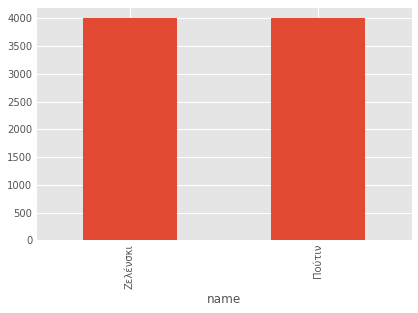

In [29]:
merged_tweets.groupby('name')['clean_text'].size().plot(kind="bar")

**WordClouds**

In [30]:
from wordcloud import WordCloud, STOPWORDS

Πούτιν

In [31]:
full_text_p=merged_tweets[merged_tweets['name']== 'Πούτιν']['clean_text'].str.cat(sep='')

In [32]:
full_text_p

"απιστευτο βίντεο η κ πελόζι ξέχασε ήδη τον γκουαιδό στη βενεζουέλα  κάνει ότι δεν θυμάται ούτε το όνομά του ρωσια κκρο ακύρωση περιφερειακών εκλογών στην ρωσική άπω ανατολή λόγω νοθείας που έγινε απο τον  εις βάρος των ρωσια κκρο ακύρωση περιφερειακών εκλογών στην ρωσική άπω ανατολή λόγω νοθείας που έγινε απο τον  εις  ρωσιακάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές το καπιταλιστικό ρωσιακάθε φορά που ο λαός βγαίνει στους δρόμους για να διαμαρτυρηθεί ενάντια στην νοθεία στις εκλογές το  υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη ο τοκαγιεφ είπε στον  δημόσια ότι δεν αναγνωρίζει ως κράτη το ντονέτσκ και το λουγκανσκτωραεπεισόδιο στην διαδικτυακή συνάντηση της csto ο  ξέχασε το όνομα του τοκάγιεφ και ο πρόεδρος του απιστευτος ρωσος στρατιωτης μικρή από το ντονμπάς σκοτώνετε τους κακούς; ρώσος στρατιώτης όχι τους  emails των εμφανίζουν να έχει συγκεντρώσει πλούτο   δισ

In [33]:
import spacy
nlp = spacy.load('el_core_news_sm')

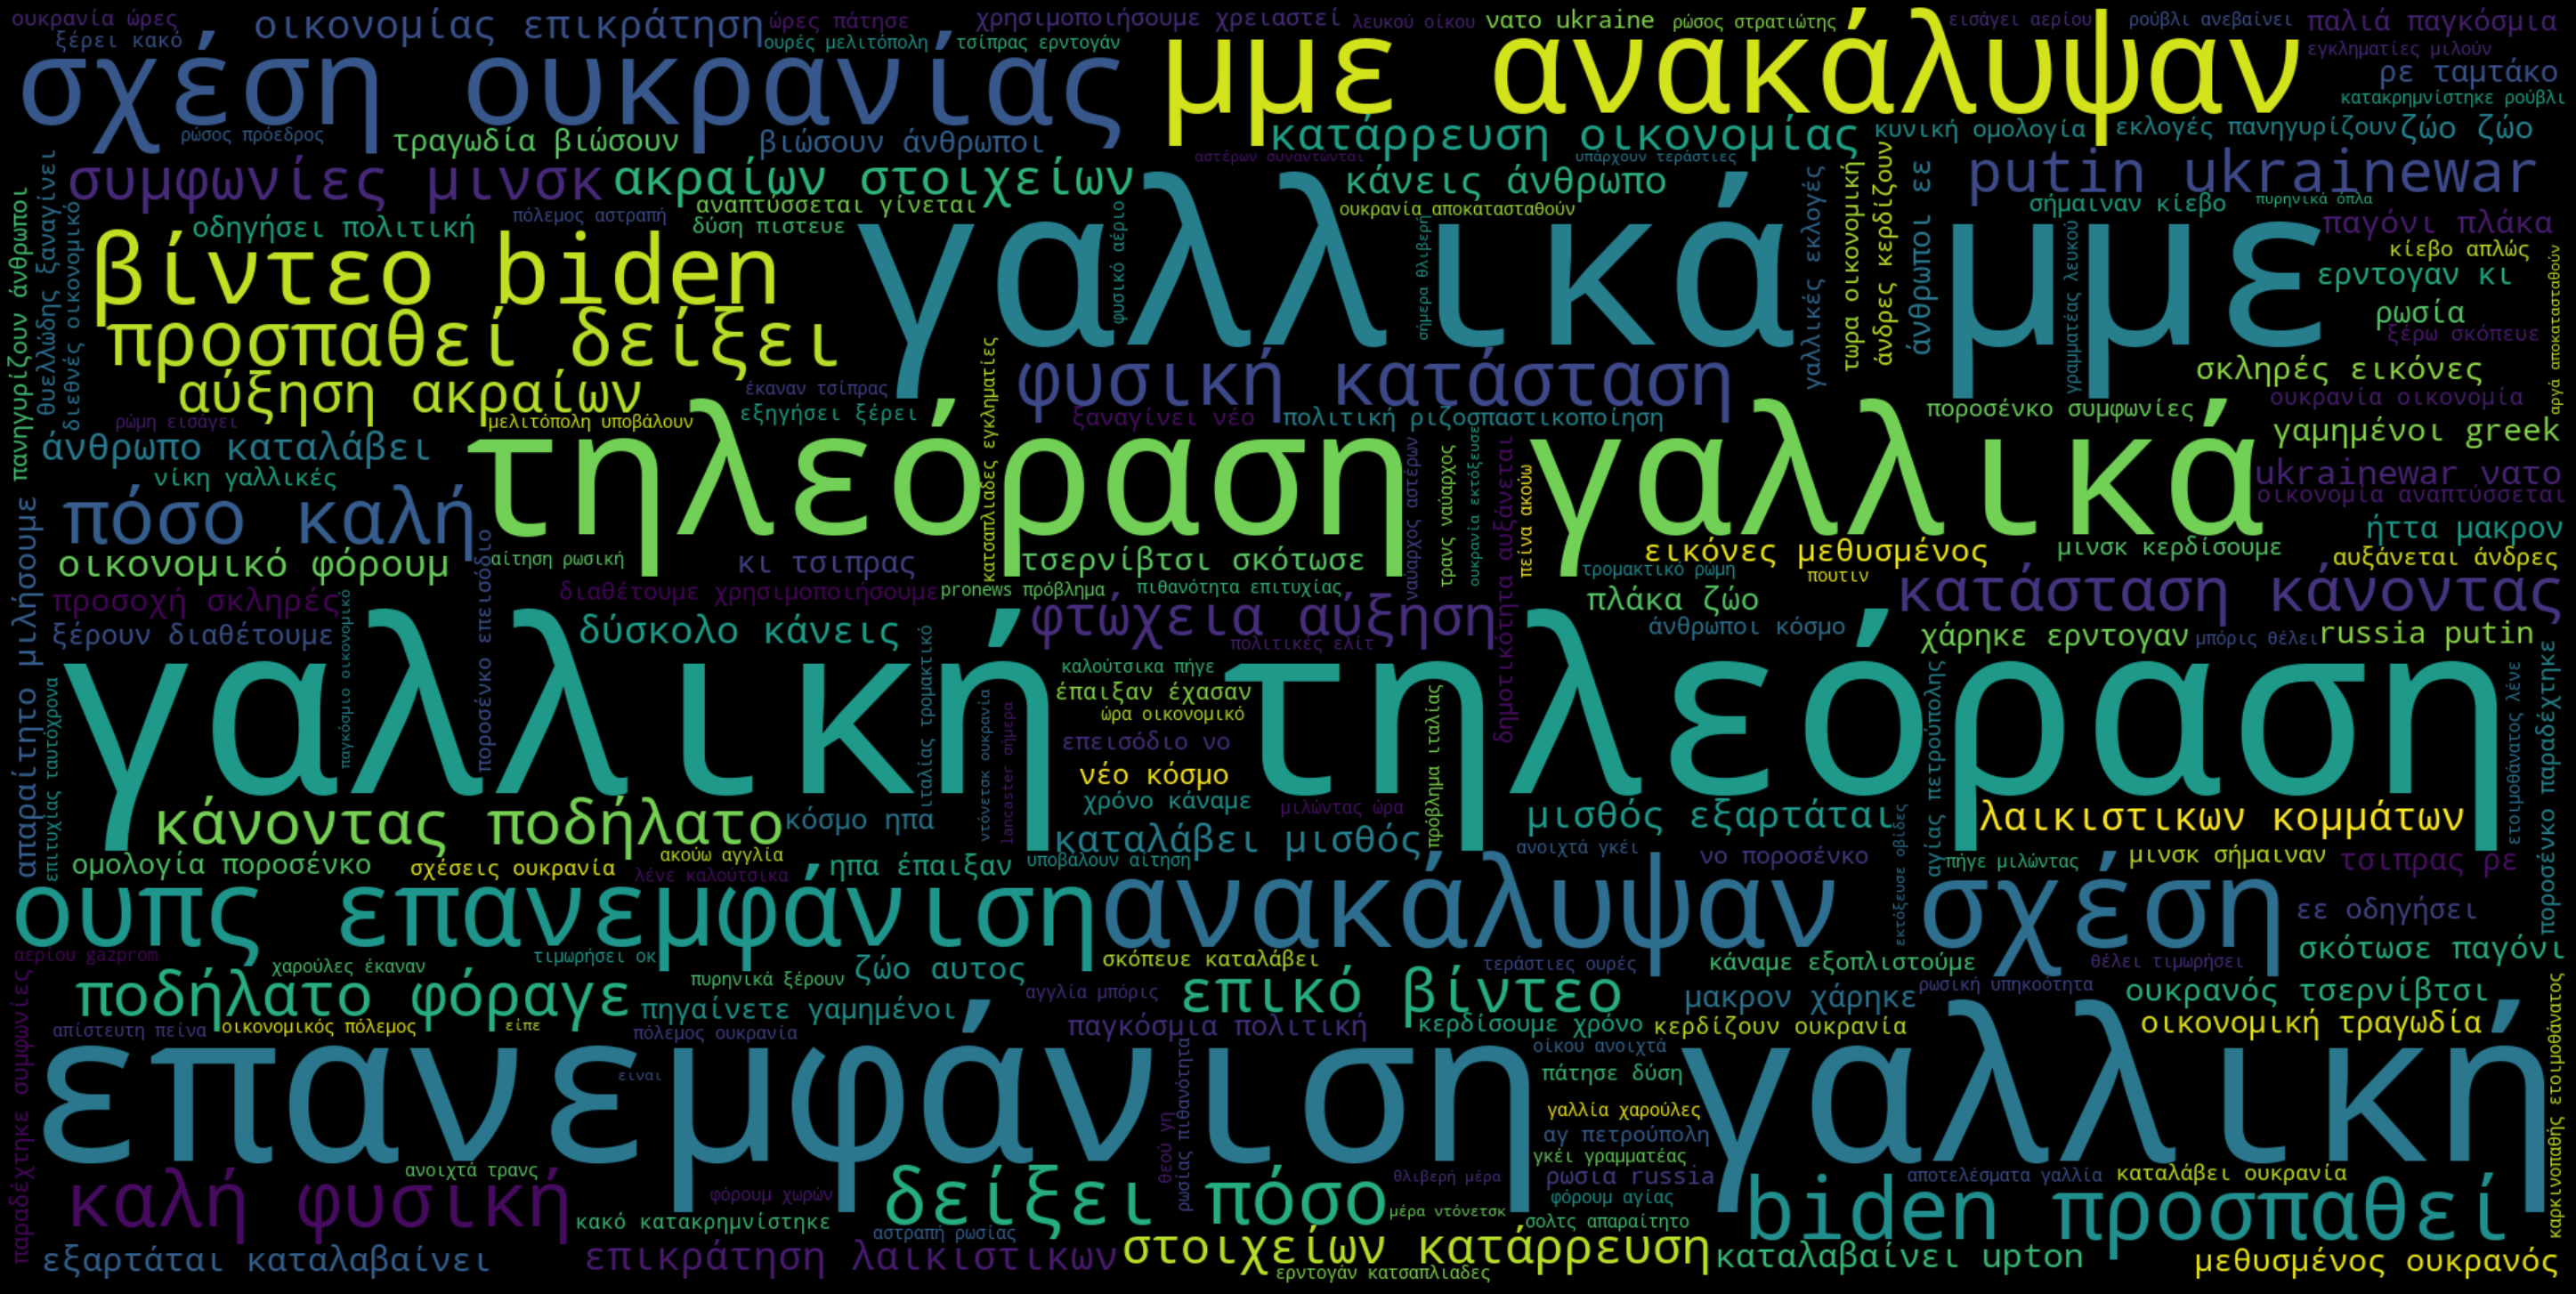

In [34]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(full_text_p) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
doc_P = nlp(full_text_p) 
lemma_text_P = ' '.join(token.lemma_ for token in doc_P)

In [36]:
mask = np.array(Image.open('/content/twitter_mask.png'))
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    mask=mask,
    width = 2000,
    height = 1000,
    background_color = 'white'
    ).generate(lemma_text_P) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

FileNotFoundError: ignored

In [ ]:
wordcloud.to_file("/content/putin_wc_t.png")

Ζελένσκι

In [37]:
full_text_z=merged_tweets[merged_tweets['name']== 'Ζελένσκι']['clean_text'].str.cat(sep='')

In [38]:
full_text_z

"υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη ιταλία ο ουκρανός πρόεδρος  ζητά την υποστήριξη στην αυριανή ψηφοφορία στη γερουσία υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη το ινδαλμα του δυτικου κοσμου ο δημοκρατης  απαγορευει ρωσικα βιβλια και μουσικη το ινδαλμα του δυτικου κοσμου ο δημοκρατης  απαγορευει ρωσικα βιβλια και μουσικη προσοχή σκληρές εικόνες μεθυσμένος ουκρανός στο τσερνίβτσι σκότωσε ένα παγόνι για πλάκα πιο ζώο από το ζώο αυτος το ινδαλμα του δυτικου κοσμου ο δημοκρατης  απαγορευει ρωσικα βιβλια και μουσικη και μετά τους πετάνε σα στυμμενες λεμονοκουπες δειτε  γκουαιδο και τοσους αλλους το ινδαλμα του δυτικου κοσμου ο δημοκρατης  απαγορευει ρωσικα βιβλια και μουσικη ιταλία ο ουκρανός πρόεδρος  ζητά την υποστήριξη στην αυριανή ψηφοφο

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(full_text_z) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
doc_Z = nlp(full_text_z) 
lemma_text_Z = ' '.join(token.lemma_ for token in doc_Z)

In [ ]:
mask = np.array(Image.open('/content/twitter_mask.png'))
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    mask=mask, 
    width = 2000,
    height = 1000,
    background_color = 'white'
    ).generate(lemma_text_Z) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
wordcloud.to_file("/content/zelensky_wc_t.png")

**Vectorization**

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Πούτιν

In [41]:
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Πούτιν']['clean_text'])
Putin_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

Putin_results.head(1)

about  action  admitted  agatha  alina  american  an  antireport  antiπαλο  \
0      0       0         0       0      0         0   0           0         0   

   ap  ...  ώρα  ώρες  ώστε  бутсо  кай  кала  путину  стон  ти  экане  
0   0  ...    0     0     0      0    0     0       0     0   0      0  

[1 rows x 4883 columns]

In [42]:
count_vector.shape

(4000, 4883)

In [43]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Πούτιν']['clean_text'])

In [45]:
Putin_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

Putin_results.head()

biden  greek  oυπς  pride  putin  russia  ukraine  ukrainewar  upton  \
0      0      0     0      0      0       0        0           0      0   
1      0      0     0      0      0       0        0           0      0   
2      0      0     0      0      0       0        0           0      0   
3      0      0     0      0      0       0        0           0      0   
4      0      0     0      0      0       0        0           0      0   

   άνθρωπο  ...  φτώχεια  φυσική  φόραγε  φόρουμ  χάρηκε  χρειαστεί  \
0        0  ...        0       0       0       0       0          0   
1        0  ...        0       0       0       0       0          0   
2        0  ...        0       0       0       0       0          0   
3        0  ...        0       0       0       0       0          0   
4        0  ...        0       0       0       0       0          0   

   χρησιμοποιήσουμε  χρόνια  χρόνο  ώρες  
0                 0       0      0     0  
1                 0       0      0     0  
2                 0       0      0     0  
3                 0       0      0     0  
4                 0       0      0     0  

[5 rows x 152 columns]

In [46]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    return(lemmatized_tokens)

In [47]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) 
 count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Πούτιν']['clean_text'])
 Putin_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
 Putin_results.head()

biden  oυπς  ανακάλυψαν  βίντεο  γαλλικά  γαλλική  εε  επανεμφάνιση  ζώο  \
0      0     0           0       1        0        0   0             0    0   
1      0     0           0       0        0        0   0             0    0   
2      0     0           0       0        0        0   0             0    0   
3      0     0           0       0        0        0   0             0    0   
4      0     0           0       0        0        0   0             0    0   

   ηπα  κόσμο  μμε  ουκρανία  ουκρανίας  ποδήλατο  ποροσένκο  ρωσία  ρωσίας  \
0    0      0    0         0          0         0          0      0       0   
1    0      0    0         0          0         0          0      0       0   
2    0      0    0         0          0         0          0      0       0   
3    0      0    0         0          0         0          0      0       0   
4    0      0    0         0          0         0          0      0       0   

   σχέση  τηλεόραση  
0      0          0  
1      0          0  
2      0          0  
3      0          0  
4      0          0

In [48]:
Putin_results.sum(axis =0).sort_values(ascending = False)

ουκρανία        410
ηπα             207
ουκρανίας       167
γαλλική         165
τηλεόραση       160
μμε             158
ρωσία           152
κόσμο           141
γαλλικά         141
εε              136
βίντεο          135
σχέση           134
επανεμφάνιση    129
oυπς            129
ανακάλυψαν      129
ρωσίας          127
biden           125
ποροσένκο       124
ζώο             116
ποδήλατο        114
dtype: int64

In [49]:
sum_words =  Putin_results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15)

ουκρανία        410
ηπα             207
ουκρανίας       167
γαλλική         165
τηλεόραση       160
μμε             158
ρωσία           152
κόσμο           141
γαλλικά         141
εε              136
βίντεο          135
σχέση           134
επανεμφάνιση    129
oυπς            129
ανακάλυψαν      129
dtype: int64

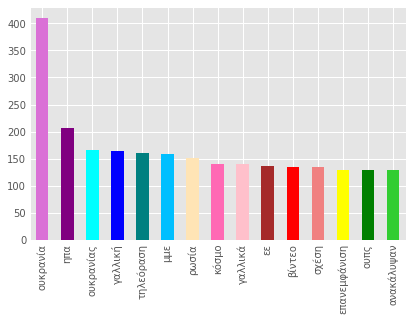

In [50]:
sum_words.sort_values(ascending = False).head(15).plot(kind='bar', color=['orchid', 'purple', 'cyan', 'blue', 'teal', 'deepskyblue', 'moccasin', 'hotpink', 'pink', 'brown', 'red', 'lightcoral', 'yellow', 'green', 'limegreen', 'lime'])
plt.savefig("/content/plot.jpg", dpi=300, bbox_inches='tight')

In [ ]:
# Putin tweets words graph with %
Putin_words =  Putin_results.sum(axis =0)
Putin_words_percent = Putin_words.sort_values(ascending = False).head(15) / Putin_words.sum() * 100

ax = Putin_words_percent.plot(kind='barh', figsize=(8,4), color = 'blue', xlabel='').invert_yaxis()
plt.title('Πούτιν | tweets: οι 15 συχνότερα εμφανιζόμενες λέξεις', y=1.05, fontweight='bold')
plt.xlabel('% εμφανιζόμενες λέξεις στο συνολικό κείμενο')
plt.savefig("/content/plot_%.png", dpi=300, bbox_inches='tight')

In [51]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range= (2, 2)) 
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Πούτιν']['clean_text'])
Putin_ngram_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
Putin_ngram_results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


biden προσπαθεί  oυπς επανεμφάνιση  putin ukrainewar  ανακάλυψαν σχέση  \
0                0                  0                 0                 0   
1                0                  0                 0                 0   
2                0                  0                 0                 0   
3                0                  0                 0                 0   
4                0                  0                 0                 0   

   βίντεο biden  γαλλικά μμε  γαλλική τηλεόραση  δείξει πόσο  \
0             0            0                  0            0   
1             0            0                  0            0   
2             0            0                  0            0   
3             0            0                  0            0   
4             0            0                  0            0   

   επανεμφάνιση γαλλική  επικό βίντεο  κάνοντας ποδήλατο  καλή φυσική  \
0                     0             0                  0            0   
1                     0             0                  0            0   
2                     0             0                  0            0   
3                     0             0                  0            0   
4                     0             0                  0            0   

   κατάσταση κάνοντας  μμε ανακάλυψαν  ποδήλατο φόραγε  προσπαθεί δείξει  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   πόσο καλή  σχέση ουκρανίας  τηλεόραση γαλλικά  φυσική κατάσταση  
0          0                0                  0                 0  
1          0                0                  0                 0  
2          0                0                  0                 0  
3          0                0                  0                 0  
4          0                0                  0                 0

In [52]:
Putin_ngram_results.sum(axis =0).sort_values(ascending = False)

γαλλική τηλεόραση       159
γαλλικά μμε             139
τηλεόραση γαλλικά       129
ανακάλυψαν σχέση        129
επανεμφάνιση γαλλική    129
oυπς επανεμφάνιση       129
μμε ανακάλυψαν          129
σχέση ουκρανίας         128
biden προσπαθεί          96
κατάσταση κάνοντας       96
πόσο καλή                96
προσπαθεί δείξει         96
κάνοντας ποδήλατο        96
καλή φυσική              96
επικό βίντεο             96
δείξει πόσο              96
βίντεο biden             96
φυσική κατάσταση         96
ποδήλατο φόραγε          95
putin ukrainewar         86
dtype: int64

In [53]:
sum_words =  Putin_ngram_results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15) 

γαλλική τηλεόραση       159
γαλλικά μμε             139
τηλεόραση γαλλικά       129
ανακάλυψαν σχέση        129
επανεμφάνιση γαλλική    129
oυπς επανεμφάνιση       129
μμε ανακάλυψαν          129
σχέση ουκρανίας         128
biden προσπαθεί          96
κατάσταση κάνοντας       96
πόσο καλή                96
προσπαθεί δείξει         96
κάνοντας ποδήλατο        96
καλή φυσική              96
επικό βίντεο             96
dtype: int64

In [ ]:
sum_words.sort_values(ascending = False).head(15).plot(kind='bar', color=['orchid', 'purple', 'cyan', 'blue', 'teal', 'deepskyblue', 'moccasin', 'hotpink', 'pink', 'brown', 'red', 'lightcoral', 'yellow', 'green', 'limegreen', 'lime'])
plt.savefig("/content/plot_bigram.jpg", dpi=300, bbox_inches='tight')

In [ ]:
# Putin tweets words graph with %
Putin_words =  Putin_ngram_results.sum(axis =0)
Putin_words_percent = Putin_words.sort_values(ascending = False).head(15) / Putin_words.sum() * 100

ax = Putin_words_percent.plot(kind='barh', figsize=(8,4), color = 'blue', xlabel='').invert_yaxis()
plt.title('Πούτιν | tweets: τα 15 συχνότερα εμφανιζόμενα ζεύγη λέξεων', y=1.05, fontweight='bold')
plt.xlabel('% εμφανιζόμενα ζεύγη λέξεων στο συνολικό κείμενο')
plt.savefig("/content/plot_bigram_%.png", dpi=300, bbox_inches='tight')

Ζελένσκι

In [54]:
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name'] == 'Ζελένσκι']['clean_text'])
Zelensky_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
Zelensky_results.head(1)

azov διεθνές  petrenko κατέλαβε  βγαίνουν κουκιά  γτ βγαίνουν  \
0             0                  0                0            0   

   δεύτερη θέση  διεθνές τουρνουά  εγκαταλείψει γτ  εε σύντομα  \
0             0                 0                0           0   

   ευρωπαίοι ηγέτες  θέση ύψωσε  κατέλαβε δεύτερη  κουκιά μείνουν  \
0                 0           0                 0               0   

   μείνουν ηλίθιοι  ουκρανή πυγμάχος  πυγμάχος petrenko  πόλεμος ουκρανία  \
0                0                 0                  0                 0   

   σημαία azov  σύντομα εγκαταλείψει  σύντομα σύντομα  ύψωσε σημαία  
0            0                     0                0             0

In [55]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [56]:
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name'] == 'Ζελένσκι']['clean_text'])
Zelensky_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
Zelensky_results.head(1)

azov  petrenko  putin  russia  ukraine  ukraineunderattack  ukrainewar  \
0     0         0      0       0        0                   0           0   

   ένταξη  ήθελε  αδελφικός  ...  τσερνίβτσι  τωρα  υεμένη  χάρκοβο  χθες  \
0       0      0          0  ...           0     0       0        0     0   

   χώρας  όλαφ  όπλα  ύψωσε  ώρα  
0      0     0     0      0    0  

[1 rows x 151 columns]

In [57]:
Zelensky_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

Zelensky_results.head()

azov  petrenko  putin  russia  ukraine  ukraineunderattack  ukrainewar  \
0     0         0      0       0        0                   0           0   
1     0         0      0       0        0                   0           0   
2     0         0      0       0        0                   0           0   
3     0         0      0       0        0                   0           0   
4     0         0      0       0        0                   0           0   

   ένταξη  ήθελε  αδελφικός  ...  τσερνίβτσι  τωρα  υεμένη  χάρκοβο  χθες  \
0       0      0          0  ...           0     0       0        0     0   
1       0      0          0  ...           0     0       0        0     0   
2       0      0          0  ...           0     0       0        0     0   
3       0      0          0  ...           0     0       0        0     0   
4       0      0          0  ...           0     0       0        0     0   

   χώρας  όλαφ  όπλα  ύψωσε  ώρα  
0      0     0     0      0    0  
1      0     0     0      0    0  
2      0     0     0      0    0  
3      0     0     0      0    0  
4      0     0     0      0    0  

[5 rows x 151 columns]

In [58]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) 
 count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Ζελένσκι']['clean_text'])
 Zelensky_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
 Zelensky_results.head()

azov  εε  ζώο  ηγέτες  ηλίθιοι  ηπα  θέση  κίεβο  μακρόν  μπάιντεν  \
0     0   0    0       0        0    0     0      0       0         0   
1     0   0    0       0        0    0     0      0       0         0   
2     0   0    0       0        0    0     0      0       0         0   
3     0   0    0       0        0    0     0      0       0         0   
4     0   0    0       0        0    0     0      0       0         0   

   ντράγκι  ουκρανία  ουκρανίας  πουτιν  πούτιν  πόλεμος  ρωσία  σολτς  \
0        0         0          0       0       0        0      0      0   
1        0         0          0       0       0        0      0      0   
2        0         0          0       0       0        0      0      0   
3        0         0          0       0       0        0      0      0   
4        0         0          0       0       0        0      0      0   

   σύντομα  όπλα  
0        0     0  
1        0     0  
2        0     0  
3        0     0  
4        0     0

In [59]:
Zelensky_results.sum(axis =0).sort_values(ascending = False)

ουκρανία     733
μακρόν       311
σολτς        281
ρωσία        268
κίεβο        240
εε           234
σύντομα      195
ντράγκι      181
ηπα          175
θέση         160
πούτιν       142
πόλεμος      142
ουκρανίας    139
ηγέτες       131
πουτιν       130
μπάιντεν     121
όπλα         120
ζώο          116
azov         113
ηλίθιοι      112
dtype: int64

In [60]:
sum_words =  Zelensky_results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15)

ουκρανία     733
μακρόν       311
σολτς        281
ρωσία        268
κίεβο        240
εε           234
σύντομα      195
ντράγκι      181
ηπα          175
θέση         160
πούτιν       142
πόλεμος      142
ουκρανίας    139
ηγέτες       131
πουτιν       130
dtype: int64

In [ ]:
sum_words.sort_values(ascending = False).head(15).plot(kind='bar', color=['orchid', 'purple', 'cyan', 'blue', 'teal', 'deepskyblue', 'moccasin', 'hotpink', 'pink', 'brown', 'red', 'lightcoral', 'yellow', 'green', 'limegreen', 'lime'])
plt.savefig("/content/plot_zelensky.png", dpi=300, bbox_inches='tight')


In [ ]:
# Zelensky tweets words graph with %
Zelensky_words =  Zelensky_results.sum(axis =0)
Zelensky_words_percent = Zelensky_words.sort_values(ascending = False).head(15) / Zelensky_words.sum() * 100

ax = Zelensky_words_percent.plot(kind='barh', figsize=(8,4), color = 'blue', xlabel='').invert_yaxis()
plt.title('Ζελένσκι | tweets: οι 15 συχνότερα εμφανιζόμενες λέξεις', y=1.05, fontweight='bold')
plt.xlabel('% εμφανιζόμενες λέξεις στο συνολικό κείμενο')
plt.savefig("/content/plot_zelensky_%.png", dpi=300, bbox_inches='tight')


In [61]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range= (2, 2)) 
count_vector = cv.fit_transform(merged_tweets[merged_tweets['name']== 'Ζελένσκι']['clean_text'])
Zelensky_ngram_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
Zelensky_ngram_results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


azov διεθνές  petrenko κατέλαβε  βγαίνουν κουκιά  γτ βγαίνουν  \
0             0                  0                0            0   
1             0                  0                0            0   
2             0                  0                0            0   
3             0                  0                0            0   
4             0                  0                0            0   

   δεύτερη θέση  διεθνές τουρνουά  εγκαταλείψει γτ  εε σύντομα  \
0             0                 0                0           0   
1             0                 0                0           0   
2             0                 0                0           0   
3             0                 0                0           0   
4             0                 0                0           0   

   ευρωπαίοι ηγέτες  θέση ύψωσε  κατέλαβε δεύτερη  κουκιά μείνουν  \
0                 0           0                 0               0   
1                 0           0                 0               0   
2                 0           0                 0               0   
3                 0           0                 0               0   
4                 0           0                 0               0   

   μείνουν ηλίθιοι  ουκρανή πυγμάχος  πυγμάχος petrenko  πόλεμος ουκρανία  \
0                0                 0                  0                 0   
1                0                 0                  0                 0   
2                0                 0                  0                 0   
3                0                 0                  0                 0   
4                0                 0                  0                 0   

   σημαία azov  σύντομα εγκαταλείψει  σύντομα σύντομα  ύψωσε σημαία  
0            0                     0                0             0  
1            0                     0                0             0  
2            0                     0                0             0  
3            0                     0                0             0  
4            0                     0                0             0

In [62]:
Zelensky_ngram_results.sum(axis =0).sort_values(ascending = False)

πόλεμος ουκρανία        111
azov διεθνές            103
θέση ύψωσε              103
σημαία azov             103
πυγμάχος petrenko       103
ουκρανή πυγμάχος        103
petrenko κατέλαβε       103
κατέλαβε δεύτερη        103
διεθνές τουρνουά        103
δεύτερη θέση            103
ύψωσε σημαία            103
εε σύντομα               95
εγκαταλείψει γτ          95
κουκιά μείνουν           95
γτ βγαίνουν              95
βγαίνουν κουκιά          95
σύντομα εγκαταλείψει     95
σύντομα σύντομα          95
μείνουν ηλίθιοι          94
ευρωπαίοι ηγέτες         93
dtype: int64

In [ ]:
sum_words =  Zelensky_ngram_results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15)

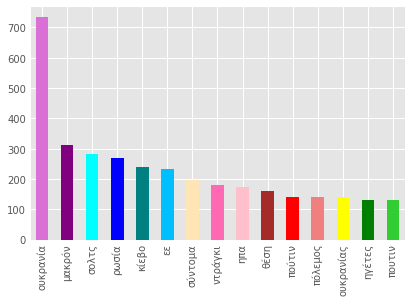

In [63]:
sum_words.sort_values(ascending = False).head(15).plot(kind='bar', color=['orchid', 'purple', 'cyan', 'blue', 'teal', 'deepskyblue', 'moccasin', 'hotpink', 'pink', 'brown', 'red', 'lightcoral', 'yellow', 'green', 'limegreen', 'lime'])
plt.savefig("/content/plot_zelensky_bigram.png", dpi=300, bbox_inches='tight')

In [ ]:
# Zelensky tweets words graph with %
Zelensky_words =  Zelensky_ngram_results.sum(axis =0)
Zelensky_words_percent = Zelensky_words.sort_values(ascending = False).head(15) / Zelensky_words.sum() * 100

ax = Zelensky_words_percent.plot(kind='barh', figsize=(8,4), color = 'blue', xlabel='').invert_yaxis()
plt.title('Ζελένσκι | tweets: τα 15 συχνότερα εμφανιζόμενα ζεύγη λέξεων', y=1.05, fontweight='bold')
plt.xlabel('% εμφανιζόμενα ζεύγη λέξεων στο συνολικό κείμενο')
plt.savefig("/content/plot_zelensky_bigram_%.png", dpi=300, bbox_inches='tight')

**Cosine Similarity**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(merged_tweets['clean_text'])

In [66]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 
results.head()

azov  biden  bloomberg  dpr  gazprom  greek   gt  new  news  oυπς  ...  \
0   0.0    0.0        0.0  0.0      0.0    0.0  0.0  0.0   0.0   0.0  ...   
1   0.0    0.0        0.0  0.0      0.0    0.0  0.0  0.0   0.0   0.0  ...   
2   0.0    0.0        0.0  0.0      0.0    0.0  0.0  0.0   0.0   0.0  ...   
3   0.0    0.0        0.0  0.0      0.0    0.0  0.0  0.0   0.0   0.0  ...   
4   0.0    0.0        0.0  0.0      0.0    0.0  0.0  0.0   0.0   0.0  ...   

   χώρα  χώρας  χώρες  ψηφιακά  όλαφ  όπλα  όπλαο  ύψωσε  ώρα  ώρες  
0   0.0    0.0    0.0      0.0   0.0   0.0    0.0    0.0  0.0   0.0  
1   0.0    0.0    0.0      0.0   0.0   0.0    0.0    0.0  0.0   0.0  
2   0.0    0.0    0.0      0.0   0.0   0.0    0.0    0.0  0.0   0.0  
3   0.0    0.0    0.0      0.0   0.0   0.0    0.0    0.0  0.0   0.0  
4   0.0    0.0    0.0      0.0   0.0   0.0    0.0    0.0  0.0   0.0  

[5 rows x 500 columns]

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train)) 

cosine scores ==>  [[1. 0. 1. ... 0. 0. 0.]]


In [68]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [69]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

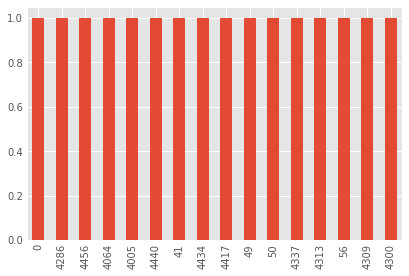

In [70]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(16).plot(kind = 'bar')

In [ ]:

corpora_dict = {}
corpora_dict['Putin'] = merged_tweets[merged_tweets['name'] == 'Πούτιν']['clean_text'].str.cat(sep = ' ')
corpora_dict['Zelensky'] = merged_tweets[merged_tweets['name'] == 'Ζελένσκι']['clean_text'].str.cat(sep = ' ')
corpora_df = pd.DataFrame.from_dict(corpora_dict, orient = 'index')
corpora_df.rename(columns = {0:'text'}, inplace = True)

In [ ]:
corpora_df

In [ ]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(corpora_df['text'])  
corpora_results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 
corpora_results.head()

In [ ]:
arr2 = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [ ]:
ax=pd.DataFrame(arr2).loc[0].sort_values(ascending = False).head(15)
ax.set_axis((["Πούτιν", "Ζελένσκι"]), axis=0, inplace=True)
ax.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.savefig("/content/plot_cosine_similarity.png", dpi=300, bbox_inches='tight')

**Sentiment Analysis**

In [71]:

filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop=True, inplace = True)

emolex_df['word'] = emolex_df['word'].str.lower()

emolex_df.head(1)

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  Joy  \
0  αφεση       1.0       0.0    0.0           0.0      0.0   0.0  0.0   

   Sadness  Surprise  Trust  
0      0.0       0.0    0.0

In [72]:
emolex_df['word'] = emolex_df['word'].str.lower()

In [73]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [74]:
emolex_df.columns

Index(['word', 'Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust',
       'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust'],
      dtype='object')

In [75]:

positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [76]:
Putin_tweets_df_dt = merged_tweets[merged_tweets['name'] == 'Πούτιν'][['datetime', 'clean_text']].copy(deep=True)
Putin_tweets_df_dt.reset_index(inplace=True)

In [77]:
Zelensky_tweets_df_dt = merged_tweets[merged_tweets['name'] == 'Ζελένσκι'][['datetime', 'clean_text']].copy(deep=True)
Zelensky_tweets_df_dt.reset_index(inplace=True)

Πούτιν

In [81]:
matrix = vec.fit_transform(Putin_tweets_df_dt['clean_text'])
vocab = vec.get_feature_names_out()
word_count_Putin_tweets_df = pd.DataFrame(matrix.toarray(), columns=vocab)
word_count_Putin_tweets_df.head(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [82]:
Putin_tweets_df_dt['positivity'] = word_count_Putin_tweets_df[positive_words].sum(axis=1)

Putin_tweets_df_dt['negativity'] = word_count_Putin_tweets_df[negative_words].sum(axis=1)

Putin_tweets_df_dt['anger'] = word_count_Putin_tweets_df[angry_words].sum(axis=1)

Putin_tweets_df_dt['anticipation'] = word_count_Putin_tweets_df[anticipation_words].sum(axis=1)

Putin_tweets_df_dt['disgust'] = word_count_Putin_tweets_df[disgust_words].sum(axis=1)

Putin_tweets_df_dt['fear'] = word_count_Putin_tweets_df[fear_words].sum(axis=1)

Putin_tweets_df_dt['joy'] = word_count_Putin_tweets_df[joy_words].sum(axis=1)

Putin_tweets_df_dt['sadness'] = word_count_Putin_tweets_df[sadness_words].sum(axis=1)

Putin_tweets_df_dt['surprise'] = word_count_Putin_tweets_df[surprise_words].sum(axis=1)

Putin_tweets_df_dt['trust'] = word_count_Putin_tweets_df[trust_words].sum(axis=1)

In [83]:
Putin_tweets_df_dt.head(2)

index            datetime  \
0   4000 2022-06-20 15:10:12   
1   4001 2022-06-20 15:09:49   

                                                                                                        clean_text  \
0     απιστευτο βίντεο η κ πελόζι ξέχασε ήδη τον γκουαιδό στη βενεζουέλα  κάνει ότι δεν θυμάται ούτε το όνομά του    
1  ρωσια κκρο ακύρωση περιφερειακών εκλογών στην ρωσική άπω ανατολή λόγω νοθείας που έγινε απο τον  εις βάρος των    

   positivity  negativity  anger  anticipation  disgust  fear  joy  sadness  \
0           0           0      0             0        0     0    0        0   
1           1           2      1             1        1     1    1        2   

   surprise  trust  
0         0      0  
1         1      1

In [84]:
Putin_tweets_df_dt = Putin_tweets_df_dt.set_index('datetime')

In [ ]:
ax = Putin_tweets_df_dt['positivity'].resample('H').sum().plot(figsize=(16,4), color = 'red')
Putin_tweets_df_dt['negativity'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green').legend()
plt.savefig("/content/plot_putin_p-n_hour.png", dpi=300, bbox_inches='tight')

Ζελένσκι

In [85]:
matrix = vec.fit_transform(Zelensky_tweets_df_dt['clean_text'])
vocab = vec.get_feature_names_out()
word_count_Zelensky_tweets_df = pd.DataFrame(matrix.toarray(), columns=vocab)
word_count_Zelensky_tweets_df.head(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [86]:
Zelensky_tweets_df_dt['positivity'] = word_count_Zelensky_tweets_df[positive_words].sum(axis=1)

Zelensky_tweets_df_dt['negativity'] = word_count_Zelensky_tweets_df[negative_words].sum(axis=1)

Zelensky_tweets_df_dt['anger'] = word_count_Zelensky_tweets_df[angry_words].sum(axis=1)

Zelensky_tweets_df_dt['anticipation'] = word_count_Zelensky_tweets_df[anticipation_words].sum(axis=1)

Zelensky_tweets_df_dt['disgust'] = word_count_Zelensky_tweets_df[disgust_words].sum(axis=1)

Zelensky_tweets_df_dt['trust'] = word_count_Zelensky_tweets_df[trust_words].sum(axis=1)

Zelensky_tweets_df_dt['fear'] = word_count_Zelensky_tweets_df[fear_words].sum(axis=1)

Zelensky_tweets_df_dt['joy'] = word_count_Zelensky_tweets_df[joy_words].sum(axis=1)

Zelensky_tweets_df_dt['sadness'] = word_count_Zelensky_tweets_df[sadness_words].sum(axis=1)

Zelensky_tweets_df_dt['surprise'] = word_count_Zelensky_tweets_df[surprise_words].sum(axis=1)

In [87]:
Zelensky_tweets_df_dt.head (2)

index            datetime  \
0      0 2022-06-20 15:21:34   
1      1 2022-06-20 15:12:38   

                                                                                                       clean_text  \
0  υπάρχουν τεράστιες ουρές στη μελιτόπολη για να υποβάλουν αίτηση για ρωσική υπηκοότητα όπως ακριβώς είχαμε στη    
1                            ιταλία ο ουκρανός πρόεδρος  ζητά την υποστήριξη στην αυριανή ψηφοφορία στη γερουσία    

   positivity  negativity  anger  anticipation  disgust  trust  fear  joy  \
0           0           0      0             0        0      0     0    0   
1           2           0      0             1        0      3     0    0   

   sadness  surprise  
0        0         0  
1        0         0

In [88]:
Zelensky_tweets_df_dt = Zelensky_tweets_df_dt.set_index('datetime')

In [ ]:
ax = Zelensky_tweets_df_dt['positivity'].resample('H').sum().plot(figsize=(16,4), color = 'red')
Zelensky_tweets_df_dt['negativity'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green').legend()
plt.savefig("/content/plot_zelensky_p-n_hour.png", dpi=300, bbox_inches='tight')

In [ ]:
ax = Zelensky_tweets_df_dt['positivity'].resample('D').sum().plot(figsize=(16,4), color = 'red')
Zelensky_tweets_df_dt['negativity'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green').legend()

**Σύγκριση**

In [ ]:

fig=plt.figure()

mylabels = ["Tweets Πούτιν", "Tweets Ζελένσκι"]
ax = Putin_tweets_df_dt[['positivity']].resample('D').mean().plot(figsize=(10,4), color="blue", linewidth=2.0)
Zelensky_tweets_df_dt[['positivity']].resample('D').mean().plot(ax=ax, color="red", linewidth=2.0)

plt.xlabel("Ημέρες")
plt.title('Η θετικότητα στα tweets του Πούτιν και του Ζελένσκι', y=1.05, fontweight='bold')
plt.xticks(rotation=0)
ax.legend(labels=mylabels)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

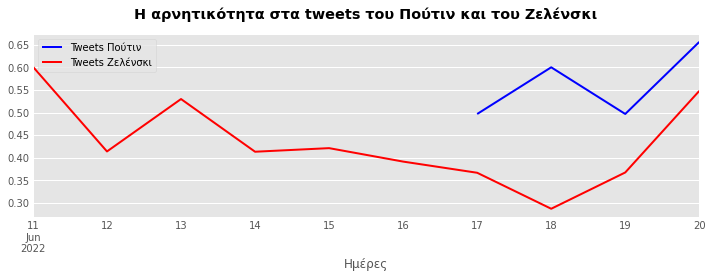

In [91]:
fig=plt.figure()

mylabels = ["Tweets Πούτιν", "Tweets Ζελένσκι"]
ax = Putin_tweets_df_dt[['negativity']].resample('D').mean().plot(figsize=(10,4), color="blue", linewidth=2.0)
Zelensky_tweets_df_dt[['negativity']].resample('D').mean().plot(ax=ax, color="red", linewidth=2.0)

plt.xlabel("Ημέρες")
plt.title('Η αρνητικότητα στα tweets του Πούτιν και του Ζελένσκι', y=1.05, fontweight='bold')
plt.xticks(rotation=0)
ax.legend(labels=mylabels)
plt.tight_layout()


In [ ]:
fig=plt.figure()

mylabels = ["Tweets Πούτιν", "Tweets Ζελένσκι"]
ax = Putin_tweets_df_dt[['positivity']].resample('H').mean().plot(figsize=(10,4), color="blue", linewidth=2.0)
Zelensky_tweets_df_dt[['positivity']].resample('H').mean().plot(ax=ax, color="red", linewidth=2.0)

plt.xlabel("Ώρες")
plt.title('Η θετικότητα στα tweets του Πούτιν και του Ζελένσκι', y=1.0, fontweight='bold')
plt.xticks(rotation=0)
ax.legend(labels=mylabels)
plt.tight_layout()
plt.savefig("/content/plot_putin_zelensky_p_hour.png", dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

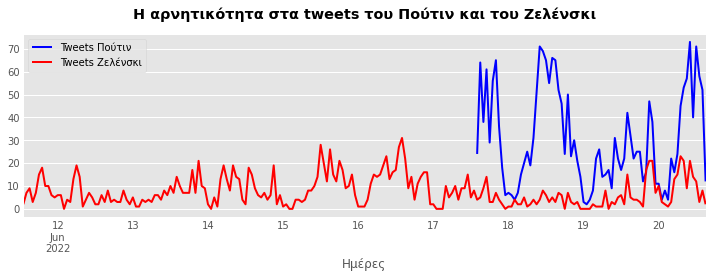

In [93]:
fig=plt.figure()

mylabels = ["Tweets Πούτιν", "Tweets Ζελένσκι"]
ax = Putin_tweets_df_dt[['negativity']].resample('H').mean().plot(figsize=(10,4), color="blue", linewidth=2.0)
Zelensky_tweets_df_dt[['negativity']].resample('H').mean().plot(ax=ax, color="red", linewidth=2.0)

plt.xlabel("Ημέρες")
plt.title('Η αρνητικότητα στα tweets του Πούτιν και του Ζελένσκι', y=1.05, fontweight='bold')
plt.xticks(rotation=0)
ax.legend(labels=mylabels)
plt.tight_layout()
plt.savefig("/content/plot_putin_zelensy_n_hour.png", dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

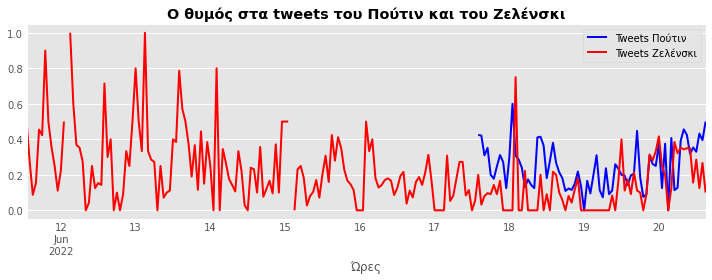

In [94]:
fig=plt.figure()

mylabels = ["Tweets Πούτιν", "Tweets Ζελένσκι"]
ax = Putin_tweets_df_dt[['anger']].resample('H').mean().plot(figsize=(10,4), color="blue", linewidth=2.0)
Zelensky_tweets_df_dt[['anger']].resample('H').mean().plot(ax=ax, color="red", linewidth=2.0)

plt.xlabel("Ώρες")
plt.title('Ο θυμός στα tweets του Πούτιν και του Ζελένσκι', y=1.0, fontweight='bold')
plt.xticks(rotation=0)
ax.legend(labels=mylabels)
plt.tight_layout()
plt.savefig("/content/plot_putin_zelensky_anger_hour_f.png", dpi=300, bbox_inches='tight')